In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)
import warnings
warnings.filterwarnings('ignore')

### Abrir base amostral 1.5MM

In [2]:
df = pd.read_csv('df_basepronta2.csv', sep = ';')

## descritiva da amostra

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NU_ANO,1529177.000000,2018.549254,2.569389,2015.000000,2016.000000,2018.000000,2021.000000,2023.000000
NU_IDADE,1529177.000000,18.383520,3.386246,10.000000,17.000000,18.000000,18.000000,83.000000
TP_ESTADO_CIVIL,1529177.000000,0.476714,0.534555,0.000000,0.000000,0.000000,1.000000,4.000000
TP_COR_RACA,1529177.000000,2.299621,0.982078,0.000000,1.000000,3.000000,3.000000,6.000000
TP_ST_CONCLUSAO,1529177.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
TP_ANO_CONCLUIU,1529177.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TP_ESCOLA,1529177.000000,2.035035,0.290189,1.000000,2.000000,2.000000,2.000000,4.000000
NU_NOTA_CN,1529177.000000,460.787984,59.856072,299.900000,415.100000,453.900000,501.300000,643.000000
NU_NOTA_CH,1529177.000000,501.400790,73.839578,293.500000,447.100000,503.400000,556.300000,727.400000
NU_NOTA_LC,1529177.000000,488.612997,65.177238,292.600000,444.700000,492.900000,535.600000,684.600000


In [10]:
  print(df['TP_COR_RACA'].value_counts(normalize=True) * 100)

3   53.662465
1   27.474024
2   13.932167
4    2.253426
0    1.811779
5    0.831051
6    0.035088
Name: TP_COR_RACA, dtype: float64


In [11]:
  print(df['TP_ESCOLA'].value_counts(normalize=True) * 100)

2   92.887219
3    4.546667
1    1.983919
4    0.582196
Name: TP_ESCOLA, dtype: float64


In [14]:
  print(df['cat_Q001'].value_counts(normalize=True) * 100)

2   23.522435
5   22.884823
3   17.048107
4   13.810911
0   13.410308
1    5.788227
6    2.596347
7    0.938841
Name: cat_Q001, dtype: float64


In [15]:
  print(df['cat_Q002'].value_counts(normalize=True) * 100)

5   33.546389
2   17.340726
4   16.829614
3   16.486758
0    5.457476
6    4.798824
1    3.455949
7    2.084264
Name: cat_Q002, dtype: float64


In [16]:
  print(df['Q005'].value_counts(normalize=True) * 100)

4.000000    32.030854
3.000000    24.412658
5.000000    18.616339
2.000000    10.782627
6.000000     7.570031
7.000000     3.214797
8.000000     1.418879
1.000000     0.705264
9.000000     0.559990
10.000000    0.369852
11.000000    0.122033
12.000000    0.084484
13.000000    0.035542
14.000000    0.020587
15.000000    0.019033
20.000000    0.014696
16.000000    0.008287
17.000000    0.005826
18.000000    0.004467
19.000000    0.003755
Name: Q005, dtype: float64


In [18]:
  print(df['cat_Q006'].value_counts(normalize=True) * 100)

1.000000   51.523691
1.500000   40.379693
0.000000    8.096616
Name: cat_Q006, dtype: float64


## descritiva dos presentes em todas as provas

In [19]:
# Import final data base - 32 MM é o total de inscristos ao longo de 9 anos ja tratado os missings
df1 = pd.read_csv('df_presentes_sm_marcada.csv', sep = ';')

In [20]:
df1.head()

,NU_ANO,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,concluinte_3ano,baixarenda,marcacao,cat_Q001,cat_Q002,cat_Q003,cat_Q004,cat_Q006,cat_Q007,cat_Q008,cat_Q009,cat_Q010,cat_Q011,cat_Q012,cat_Q013,cat_Q014,cat_Q015,cat_Q016,cat_Q017,cat_Q019,cat_Q022,cat_Q024,cat_Q018,cat_Q020,cat_Q021,cat_Q023,cat_Q025,FEMININO,REG_UF,cat_Norte,cat_Nordeste,cat_Sul,cat_CentroOeste,cat_Sudeste,tem_TIC,tem_TICv2,tem_TICv3,TIC,I,C,sóI,sóC,IeC
0,2015,20.000000,0.000000,3,1,3,1,385.300000,550.100000,496.400000,355.700000,500.000000,5.000000,0,1,0,1,2,1,1,1.500000,0,2,3,0,1,1,0,1,1,1,0,2,3,1,0,1,0,1,0,1,Norte,1,0,0,0,0,TEM_PC,NI,NI,3,0,1,0,1,0
1,2015,17.000000,0.000000,1,2,0,3,454.500000,583.700000,498.500000,498.200000,440.000000,4.000000,1,0,0,4,5,3,2,7.000000,0,2,3,1,0,1,1,1,0,1,0,2,4,2,1,1,1,1,1,1,Sudeste,0,0,0,0,1,PC_NET,I_Comp_Cel,IeC,4,1,1,0,0,1
2,2015,20.000000,0.000000,3,1,2,1,352.400000,489.700000,442.200000,416.300000,360.000000,2.000000,0,1,0,1,2,2,1,0.000000,0,1,2,0,0,1,0,0,0,0,0,1,2,0,0,1,0,0,0,1,Nordeste,0,1,0,0,0,NAO_TEM,NI,NI,1,0,0,0,0,0
3,2015,15.000000,0.000000,1,3,0,1,536.500000,537.800000,535.200000,504.500000,520.000000,3.000000,0,1,0,3,5,0,0,1.000000,0,1,2,1,0,1,0,1,1,0,0,1,3,1,0,0,0,1,1,1,Sudeste,0,0,0,0,1,PC_NET,I_Comp_Cel,IeC,4,1,1,0,0,1
4,2015,20.000000,0.000000,1,1,2,1,474.500000,474.400000,517.400000,490.600000,260.000000,3.000000,0,1,0,2,2,4,4,1.000000,0,1,2,0,0,1,0,0,0,0,0,1,2,0,0,1,0,0,0,1,Sudeste,0,0,0,0,1,NAO_TEM,NI,NI,1,0,0,0,0,0


In [ ]:
df1.describe().T

In [25]:
df=df1
list(df)

['NU_ANO',
 'NU_IDADE',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_REDACAO',
 'Q005',
 'concluinte_3ano',
 'baixarenda',
 'marcacao',
 'cat_Q001',
 'cat_Q002',
 'cat_Q003',
 'cat_Q004',
 'cat_Q006',
 'cat_Q007',
 'cat_Q008',
 'cat_Q009',
 'cat_Q010',
 'cat_Q011',
 'cat_Q012',
 'cat_Q013',
 'cat_Q014',
 'cat_Q015',
 'cat_Q016',
 'cat_Q017',
 'cat_Q019',
 'cat_Q022',
 'cat_Q024',
 'cat_Q018',
 'cat_Q020',
 'cat_Q021',
 'cat_Q023',
 'cat_Q025',
 'FEMININO',
 'REG_UF',
 'cat_Norte',
 'cat_Nordeste',
 'cat_Sul',
 'cat_CentroOeste',
 'cat_Sudeste',
 'tem_TIC',
 'tem_TICv2',
 'tem_TICv3',
 'TIC',
 'I',
 'C',
 'sóI',
 'sóC',
 'IeC']

In [24]:
# DataFrame para armazenar os resultados
results = pd.DataFrame()

# Iterar sobre todas as colunas categóricas ou colunas com possíveis categorias
for column in df.select_dtypes(include=['object', 'category', 'int']).columns:
    # Calcular o percentual de cada categoria
    percentuais = df[column].value_counts(normalize=True) * 100
    percentuais = percentuais.apply(lambda x: f"{x:.2f}%")
        
    # Transformar em DataFrame e adicionar o nome da coluna como nível
    percentuais_df = percentuais.reset_index()
    percentuais_df.columns = [column, 'Percentual']

    
    # Adicionar o nome da variável categórica como uma nova coluna
    percentuais_df['Variavel'] = column
    
    # Concatenar os resultados no DataFrame final
    results = pd.concat([results, percentuais_df], axis=0)

# Reordenar as colunas
results = results[['Variavel', column, 'Percentual']]

# Salvar os resultados em um arquivo CSV
results.to_csv('percentuais_categorias.csv', index=False)

In [ ]:
pi = pd.crosstab(df_efixo['infra_domicilio'], df_efixo['cat_Q008'])

## TENTAR DESCRITIVA CJTA

In [ ]:
#%graficos de barras 100%

# 'variaveis_interesse'  uma lista das colunas dummies
variaveis_interesse = ['FEMININO', 'sóI', 'sóC', 'IeC', 'Branca', 'Parda', 'Preta', 'raca_outra',
    'CentroOeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul', 'escoutro', 'escpubl','escMaedesc1', 'escMaenuncaincompl2', 'escMaefund3', 'escMaemed4',
    'escMaegradmais5', 'escPaidesc1', 'escPainuncaincompl2', 'escPaifund3','escPaimed4', 'escPaigradmais5', 'tamfam3peq', 'tamfam5med', 'tamfam6gde',
    'infra_basicacompleta', 'infra_basicaincompleta','renda_0', 'renda_1', 'renda_15']


# Adicione uma coluna indicando a origem dos dados
presentes['Origem'] = 'Presentes'
amostra['Origem'] = 'Amostra'

# Combine os dois DataFrames
dados_combinados = pd.concat([presentes, amostra])

# Função para criar gráficos de barras para cada variável dummy
def grafico_barras(var):
    # Calcular as proporções para cada categoria e converter para percentuais
    proporcoes = dados_combinados.groupby('Origem')[var].mean().reset_index()
    proporcoes[var] = proporcoes[var] * 100  # Converter para percentuais
    
    # Criar o gráfico de barras
    sns.barplot(x='Origem', y=var, data=proporcoes)
    plt.title(f'Comparação da Distribuição - {var}')
    plt.ylabel('Percentual (%)')
    plt.xlabel('Origem')
    plt.ylim(0, 100)  # Definir o limite do eixo y para 0-100%
    plt.show()

# Crie um gráfico para cada variável de interesse
for var in variaveis_interesse:
    grafico_barras(var)

## fazer graficos variaveis categoricas (barras)

In [ ]:
# Suponha que 'variaveis_interesse' seja uma lista das colunas dummies que você quer comparar
variaveis_interesse = ['FEMININO', 'sóI', 'sóC', 'IeC', 'Branca', 'Parda', 'Preta', 'raca_outra',
    'CentroOeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul', 'escoutro', 'escpubl','escMaedesc1', 'escMaenuncaincompl2', 'escMaefund3', 'escMaemed4',
    'escMaegradmais5', 'escPaidesc1', 'escPainuncaincompl2', 'escPaifund3','escPaimed4', 'escPaigradmais5', 'tamfam3peq', 'tamfam5med', 'tamfam6gde',
    'infra_basicacompleta', 'infra_basicaincompleta','renda_0', 'renda_1', 'renda_15']

# Adicione uma coluna indicando a origem dos dados
presentes['Origem'] = 'Presentes'
amostra['Origem'] = 'Amostra'

# Combine os dois DataFrames
dados_combinados = pd.concat([presentes, amostra])

# Função para criar gráficos de barras para cada variável dummy
def grafico_barras(var):
    # Calcular as proporções para cada categoria
    proporcoes = dados_combinados.groupby('Origem')[var].mean().reset_index()
    
    # Criar o gráfico de barras
    sns.barplot(x='Origem', y=var, data=proporcoes)
    plt.title(f'Comparação da Distribuição - {var}')
    plt.ylabel('Proporção')
    plt.xlabel('Origem')
    plt.ylim(0, 1)
    plt.show()

# Crie um gráfico para cada variável de interesse
for var in variaveis_interesse:
    grafico_barras(var)

## perfil concluintes3ano - ao longo dos anos referente a TP_ST_CONCLUSAO

In [ ]:
var1 = 'NU_ANO'
var2 = 'TP_ST_CONCLUSAO'
var3 = 'NU_MEDIA'
name = 'media'

a = df.groupby([var1, var2]).size().reset_index(name = 'qtde')
b = df.groupby([var1, var2])[var3].mean().reset_index(name = name)
c = a.merge(b, on = [var1, var2], how = 'left')
pi = c.pivot(index = var1, columns = var2, values = name)
qt = c.pivot(index = var1, columns = var2, values = 'qtde')

## agrupei o publico de baixa renda pra gerar o grafico acumulado de top10 e botton10

In [ ]:
df['cat_Q006v1'] = np.where(df['cat_Q006'] <= 1.5, 1, df['cat_Q006'])

In [ ]:
df['cat_Q006v1'].value_counts

In [ ]:
var = 'NU_MEDIA'
nfxs = 10
fx_var = 'fx_' + var

ser, bins = pd.qcut(df[var], nfxs, retbins = True, labels = False, duplicates = 'drop')
df[fx_var] = pd.cut(df[var], bins = bins, labels = False, include_lowest = True)

var1 = fx_var
var2 = 'cat_Q006v1'
var3 = 'IeC'
name = 'perc_internetpc'

a = df.groupby([var1, var2]).size().reset_index(name = 'qtde')
b = df.groupby([var1, var2])[var3].mean().reset_index(name = name)
c = a.merge(b, on = [var1, var2], how = 'left')
pi = c.pivot(index = var1, columns = var2, values = name)
qt = c.pivot(index = var1, columns = var2, values = 'qtde')

In [ ]:
pi

In [ ]:
qt

## fazer graficos variaveis continuas (densidade, distribuição)

In [ ]:
# Suponha que 'variaveis_interesse' seja uma lista das colunas que você quer comparar


# Adicione uma coluna indicando a origem dos dados
presentes['Origem'] = 'Presentes'
amostra['Origem'] = 'Amostra'

# Combine os dois DataFrames
dados_combinados = pd.concat([presentes, amostra])

# Função para criar gráficos de densidade para cada variável
def grafico_densidade(var):
    g = sns.FacetGrid(dados_combinados, hue="Origem", height=4, aspect=2)
    g.map(sns.kdeplot, var, shade=True).add_legend()
    g.set_axis_labels(var, 'Densidade')
    g.fig.suptitle(f'Comparação da Distribuição - {var}', y=1.03)
    plt.show()

# Crie um gráfico para cada variável de interesse
for var in variaveis_interesse:
    grafico_densidade(var)

### gráfico que compara os top 10 com os bottom 10 e analisa a media de acesso a internet e computador

In [4]:
var2 = 'tem_TIC'
var1 = 'tem_TICv3'

var3 = 'NU_MEDIA'
name = 'media'

a = df.groupby([var1, var2]).size().reset_index(name = 'qtde')
b = df.groupby([var1, var2])[var3].mean().reset_index(name = name)
c = a.merge(b, on = [var1, var2], how = 'left')
pi = c.pivot(index = var1, columns = var2, values = name)
qt = c.pivot(index = var1, columns = var2, values = 'qtde')
pi
qt

tem_TIC,NAO_TEM,PC_NET,TEM_NET,TEM_PC
tem_TICv3,,,,
IeC,NaN,504447.000000,NaN,NaN
IenC,NaN,NaN,484197.000000,NaN
NI,487915.000000,NaN,NaN,68111.000000


In [5]:
var = 'NU_MEDIA'
nfxs = 10
fx_var = 'fx_' + var

ser, bins = pd.qcut(df[var], nfxs, retbins = True, labels = False, duplicates = 'drop')
df[fx_var] = pd.cut(df[var], bins = bins, labels = False, include_lowest = True)

var1 = fx_var
var2 = 'cat_Q006'
var3 = 'I'
name = 'perc_internet'

a = df.groupby([var1, var2]).size().reset_index(name = 'qtde')
b = df.groupby([var1, var2])[var3].mean().reset_index(name = name)
c = a.merge(b, on = [var1, var2], how = 'left')
pi = c.pivot(index = var1, columns = var2, values = name)
qt = c.pivot(index = var1, columns = var2, values = 'qtde')

In [6]:
pi

cat_Q006,0.000000,1.000000,1.500000
fx_NU_MEDIA,,,
0,0.454743,0.541427,0.680247
1,0.437803,0.515338,0.677032
2,0.425265,0.517624,0.685975
3,0.434163,0.531587,0.700664
4,0.454203,0.548040,0.717661
5,0.469446,0.570369,0.736518
6,0.489519,0.597069,0.753971
7,0.529458,0.628439,0.779219
8,0.589033,0.668464,0.809503


In [7]:
qt

cat_Q006,0.000000,1.000000,1.500000
fx_NU_MEDIA,,,
0,21135,94020,39421
1,17332,89875,47274
2,15120,87407,52050
3,13693,84466,56141
4,12206,82098,60105
5,11275,79026,64270
6,10114,76209,68183
7,8945,72505,72873
8,8042,68451,77975


In [9]:
var = 'NU_MEDIA'
nfxs = 10
fx_var = 'fx_' + var

ser, bins = pd.qcut(df[var], nfxs, retbins = True, labels = False, duplicates = 'drop')
df[fx_var] = pd.cut(df[var], bins = bins, labels = False, include_lowest = True)

var1 = fx_var
var2 = 'cat_Q006'
var3 = 'cat_Q024'
name = 'perc_internet'

a = df.groupby([var1, var2]).size().reset_index(name = 'qtde')
b = df.groupby([var1, var2])[var3].mean().reset_index(name = name)
c = a.merge(b, on = [var1, var2], how = 'left')
pi = c.pivot(index = var1, columns = var2, values = name)
qt = c.pivot(index = var1, columns = var2, values = 'qtde')

In [10]:
pi

cat_Q006,0.000000,1.000000,1.500000
fx_NU_MEDIA,,,
0,0.103383,0.186971,0.416783
1,0.127164,0.216623,0.455515
2,0.145635,0.234958,0.483381
3,0.165851,0.255180,0.505174
4,0.189251,0.275999,0.531653
5,0.207894,0.295257,0.555065
6,0.228297,0.318873,0.580321
7,0.289547,0.352348,0.609512
8,0.354265,0.395947,0.656698


In [11]:
qt

cat_Q006,0.000000,1.000000,1.500000
fx_NU_MEDIA,,,
0,21135,94020,39421
1,17332,89875,47274
2,15120,87407,52050
3,13693,84466,56141
4,12206,82098,60105
5,11275,79026,64270
6,10114,76209,68183
7,8945,72505,72873
8,8042,68451,77975


## 
## 
## 
## 
## 
## 
## Análise da amostra (1.5 MM)

### Qual a média da nota pra quem 'NAO_TEM', 'TEM_NET' TEM_PC', 'PC_NET'?

In [12]:
var0 = 'NU_ANO'
var1 = 'tem_TIC'
var2 = 'NU_MEDIA'
name = 'nota média'

a = df.groupby([var0, var1])[var2].size().reset_index(name = 'qtde')
b = df.groupby([var0, var1])[var2].mean().reset_index(name = name)
c = a.merge(b, on = [var0, var1], how = 'left')
#pi = c.pivot(index = var0, columns = var1,var2, values = 'NU_MEDIA')
#qt = c.pivot(index = var0, columns = var1,var2, values = 'qtde')

In [13]:
c

,NU_ANO,tem_TIC,qtde,nota média
0,2015,NAO_TEM,85372,461.922721
1,2015,PC_NET,78203,486.117820
2,2015,TEM_NET,13264,470.562092
3,2015,TEM_PC,19807,479.208609
4,2016,NAO_TEM,93985,467.483377
5,2016,PC_NET,82242,493.786778
6,2016,TEM_NET,27267,477.165322
7,2016,TEM_PC,17896,484.607561
8,2017,NAO_TEM,83847,471.028703
9,2017,PC_NET,75208,501.308170


In [14]:
var1 = 'marcacao'
var2 = 'NU_ANO'
var3 = 'NU_MEDIA'
name = 'notamedia'

a = df.groupby([var1, var2]).size().reset_index(name = 'qtde')
b = df.groupby([var1, var2])[var3].mean().reset_index(name = name)
c = a.merge(b, on = [var1, var2], how = 'left')
pi = c.pivot(index = var1, columns = var2, values = name)
qt = c.pivot(index = var1, columns = var2, values = 'qtde')

In [15]:
#sns.kdeplot(data=df, x="NU_MEDIA", hue="NU_ANO")

### Ver NU_MEDIA_OB % de acesso por fx de renda e nota

In [16]:
var = 'NU_MEDIA'
nfxs = 10
fx_var = 'fx_' + var

ser, bins = pd.qcut(df[var], nfxs, retbins = True, labels = False, duplicates = 'drop')
df[fx_var] = pd.cut(df[var], bins = bins, labels = False, include_lowest = True)

var1 = fx_var
var2 = 'cat_Q006'
var3 = 'cat_Q025'
name = 'perc_internet'

a = df.groupby([var1, var2]).size().reset_index(name = 'qtde')
b = df.groupby([var1, var2])[var3].mean().reset_index(name = name)
c = a.merge(b, on = [var1, var2], how = 'left')
pi = c.pivot(index = var1, columns = var2, values = name)
qt = c.pivot(index = var1, columns = var2, values = 'qtde')

In [17]:
pi

cat_Q006,0.000000,1.000000,1.500000
fx_NU_MEDIA,,,
0,0.454743,0.541427,0.680247
1,0.437803,0.515338,0.677032
2,0.425265,0.517624,0.685975
3,0.434163,0.531587,0.700664
4,0.454203,0.548040,0.717661
5,0.469446,0.570369,0.736518
6,0.489519,0.597069,0.753971
7,0.529458,0.628439,0.779219
8,0.589033,0.668464,0.809503


In [18]:
qt

cat_Q006,0.000000,1.000000,1.500000
fx_NU_MEDIA,,,
0,21135,94020,39421
1,17332,89875,47274
2,15120,87407,52050
3,13693,84466,56141
4,12206,82098,60105
5,11275,79026,64270
6,10114,76209,68183
7,8945,72505,72873
8,8042,68451,77975


### % de acesso a internet por Fx de renda por classe

In [19]:
#baixa renda -> até 1.5 salarios min
#média renda -> 1.5 - 7 salários min
#alta renda -> acima de 7 salários min

df['classe'] = np.where(df.cat_Q006 <= 1.5, 1,
                       np.where(df.cat_Q006 <= 7, 2, 3))

var1 = fx_var
var2 = 'classe'
var3 = 'cat_Q025'
name = 'perc_internet'

a = df.groupby([var1, var2]).size().reset_index(name = 'qtde')
b = df.groupby([var1, var2])[var3].mean().reset_index(name = name)
c = a.merge(b, on = [var1, var2], how = 'left')
pi = c.pivot(index = var1, columns = var2, values = name)
qt = c.pivot(index = var1, columns = var2, values = 'qtde')

In [20]:
pi

classe,1
fx_NU_MEDIA,
0,0.564978
1,0.556120
2,0.565278
3,0.584459
4,0.606649
5,0.632091
6,0.659269
7,0.693902
8,0.735525


In [21]:
qt

classe,1
fx_NU_MEDIA,
0,154576
1,154481
2,154577
3,154300
4,154409
5,154571
6,154506
7,154323
8,154468


### olhar ao longo dos anos e por classe de renda p ver se entrelaçam

In [22]:
#cria as faixas de nota

var = 'NU_MEDIA'
nfxs = 10
fx_var = 'fx_' + var

ser, bins = pd.qcut(df[var], nfxs, retbins = True, labels = False, duplicates = 'drop')
df[fx_var] = pd.cut(df[var], bins = bins, labels = False, include_lowest = True)

#cria as classes por renda (renda baixa, media e alta)
df['classe'] = np.where(df.cat_Q006 <= 1, 1,
                       np.where(df.cat_Q006 <= 7, 2, 3))

#declara nota, renda, internet
fx_nota = fx_var
fx_renda = 'cat_Q006'
internet = 'IeC'
nota = 'NU_MEDIA'
ano = 'NU_ANO'
classe = 'classe'
name = 'perc_internet'
name1 = 'notas medias objetivas'

# a- avalia qtde de pessoas por fx-nota e renda | # b- avalia media de internet por fx-nota e renda | # c- junta tudo em uma unica base
#pi - guarda o % de acesso medio por fx_var e renda
#qt = guarda as qtdes de alunos por fx_var e renda

#pi - guarda as médias da nota por fx_var e ano
#qt = guarda as qtdes de alunos por fx_var e ano

a = df.groupby([fx_nota, fx_renda]).size().reset_index(name = 'qtde')
b = df.groupby([fx_nota, fx_renda])[internet].mean().reset_index(name = name)
c = a.merge(b, on = [fx_nota, fx_renda], how = 'left')

pi = c.pivot(index = fx_nota, columns = fx_renda, values = name)
qt = c.pivot(index = fx_nota, columns = fx_renda, values = 'qtde')


#pi2 - guarda as médias por fx_var e ano
#qt2 = guarda as qtdes de alunos por fx_var e ano
d = df.groupby([internet, ano]).size().reset_index(name = 'qtde')
e = df.groupby([internet, ano])[nota].mean().reset_index(name = name1)
f = d.merge(e, on = [internet, ano], how = 'left')

pi2 = f.pivot(index = internet, columns = ano, values = name1)
qt2 = f.pivot(index = internet, columns = ano, values = 'qtde')

In [23]:
pi2

NU_ANO,2015,2016,2017,2018,2019,2020,2021,2022,2023
IeC,,,,,,,,,
0,465.780899,471.582983,476.128572,492.933992,469.056504,467.936394,462.037341,477.256894,474.541140
1,486.117820,493.786778,501.308170,518.422267,496.757911,502.202254,494.876656,507.111231,506.966293


In [24]:
qt2

NU_ANO,2015,2016,2017,2018,2019,2020,2021,2022,2023
IeC,,,,,,,,,
0,118443,139148,136329,134602,135010,82621,76401,96903,120766
1,78203,82242,75208,63656,55568,34603,37345,40239,37383


In [25]:
#cria as faixas de nota

var = 'NU_MEDIA'
nfxs = 10
fx_var = 'fx_' + var

ser, bins = pd.qcut(df[var], nfxs, retbins = True, labels = False, duplicates = 'drop')
df[fx_var] = pd.cut(df[var], bins = bins, labels = False, include_lowest = True)

#cria as classes por renda (renda baixa, media e alta)
df['classe'] = np.where(df.cat_Q006 <= 1, 1,
                       np.where(df.cat_Q006 <= 7, 2, 3))

#declara nota, renda, internet
fx_nota = fx_var
fx_renda = 'cat_Q006'
internet = 'cat_Q024'
nota = 'NU_MEDIA'
ano = 'NU_ANO'
classe = 'classe'
name = 'perc_internet'
name1 = 'notas medias objetivas'

# a- avalia qtde de pessoas por fx-nota e renda | # b- avalia media de internet por fx-nota e renda | # c- junta tudo em uma unica base
#pi - guarda o % de acesso medio por fx_var e renda
#qt = guarda as qtdes de alunos por fx_var e renda

#pi - guarda as médias da nota por fx_var e ano
#qt = guarda as qtdes de alunos por fx_var e ano

a = df.groupby([fx_nota, fx_renda]).size().reset_index(name = 'qtde')
b = df.groupby([fx_nota, fx_renda])[internet].mean().reset_index(name = name)
c = a.merge(b, on = [fx_nota, fx_renda], how = 'left')

pi = c.pivot(index = fx_nota, columns = fx_renda, values = name)
qt = c.pivot(index = fx_nota, columns = fx_renda, values = 'qtde')


#pi2 - guarda as médias por fx_var e ano
#qt2 = guarda as qtdes de alunos por fx_var e ano
d = df.groupby([internet, ano]).size().reset_index(name = 'qtde')
e = df.groupby([internet, ano])[nota].mean().reset_index(name = name1)
f = d.merge(e, on = [internet, ano], how = 'left')

pi3 = f.pivot(index = internet, columns = ano, values = name1)
qt3 = f.pivot(index = internet, columns = ano, values = 'qtde')

In [26]:
pi3

NU_ANO,2015,2016,2017,2018,2019,2020,2021,2022,2023
cat_Q024,,,,,,,,,
0,463.084493,469.660641,474.623309,492.006537,468.398669,467.358345,461.817142,477.170880,474.451141
1,483.650319,490.953840,498.655941,516.146204,494.330666,499.681680,492.273278,505.262036,505.081391
2,498.209674,507.479489,516.575528,534.535489,515.864987,524.533008,516.047972,520.137144,521.928699
3,501.261239,513.836660,522.249148,530.720620,518.775507,543.244995,521.286894,523.545619,525.720863
4,510.989007,524.783947,516.116180,534.342976,526.973136,537.229043,535.550596,520.396526,525.619553


In [27]:
qt3

NU_ANO,2015,2016,2017,2018,2019,2020,2021,2022,2023
cat_Q024,,,,,,,,,
0,98636,121252,123970,126689,129726,80577,75350,95928,119984
1,91121,93374,81749,67190,56956,34140,35096,37588,34874
2,5926,5880,5018,3780,3322,2133,2818,3122,2778
3,783,700,615,471,440,309,408,409,408
4,180,184,185,128,134,65,74,95,105


In [28]:
c

,fx_NU_MEDIA,cat_Q006,qtde,perc_internet
0,0,0.000000,21135,0.103383
1,0,1.000000,94020,0.186971
2,0,1.500000,39421,0.416783
3,1,0.000000,17332,0.127164
4,1,1.000000,89875,0.216623
5,1,1.500000,47274,0.455515
6,2,0.000000,15120,0.145635
7,2,1.000000,87407,0.234958
8,2,1.500000,52050,0.483381
9,3,0.000000,13693,0.165851


In [33]:
nota = 'NU_MEDIA'
x = df.groupby(['cat_Q025','NU_ANO', 'classe'])[nota].mean(nota).reset_index(name = 'notas',level = None)
y = df.groupby(['cat_Q025','NU_ANO', 'classe'])[nota].size().reset_index(name = 'qtde',level = None)

In [34]:
y

,cat_Q025,NU_ANO,classe,qtde
0,0,2015,1,69208
1,0,2015,2,35971
2,0,2016,1,75326
3,0,2016,2,36555
4,0,2017,1,70591
5,0,2017,2,25615
6,0,2018,1,56000
7,0,2018,2,24845
8,0,2019,1,48133
9,0,2019,2,19516


In [35]:
x

,cat_Q025,NU_ANO,classe,notas
0,0,2015,1,460.482785
1,0,2015,2,474.211416
2,0,2016,1,466.280998
3,0,2016,2,478.344402
4,0,2017,1,469.581225
5,0,2017,2,484.763449
6,0,2018,1,485.177088
7,0,2018,2,498.525542
8,0,2019,1,460.604138
9,0,2019,2,474.111614


In [36]:
var = 'NU_MEDIA'
nfxs = 10
fx_var = 'fx_' + var

ser, bins = pd.qcut(df[var], nfxs, retbins = True, labels = False, duplicates = 'drop')
df[fx_var] = pd.cut(df[var], bins = bins, labels = False, include_lowest = True)

a = df.groupby([fx_nota, fx_renda]).size().reset_index(name = 'qtde')
b = df.groupby([fx_nota, fx_renda])[var].mean(var).reset_index(name = 'notas')
c = a.merge(b, on = [fx_nota, fx_renda], how = 'left')

In [37]:
c

,fx_NU_MEDIA,cat_Q006,qtde,notas
0,0,0.000000,21135,396.921029
1,0,1.000000,94020,397.674535
2,0,1.500000,39421,399.104636
3,1,0.000000,17332,424.947224
4,1,1.000000,89875,425.111832
5,1,1.500000,47274,425.300902
6,2,0.000000,15120,441.063186
7,2,1.000000,87407,441.111827
8,2,1.500000,52050,441.269560
9,3,0.000000,13693,454.932872


In [ ]:
def rend_by_class(df, clas, clas_name, y1min, y1max, y2min, y2max):
    
    var2 = 'NU_ANO'
    var3 = 'cat_Q025'
    var4 = 'NU_MEDIA'
    tit  = 'Nota Média Geral e Acesso a Internet na ' + clas_name
    clas = clas

    a = df[df['classe'] == clas].groupby([var2])[var4].mean().reset_index(name = 'mean_nota')
    b = df[df['classe'] == clas].groupby([var2])[var3].mean().reset_index(name = 'perc_internet')
    c = a.merge(b, on = [var2], how = 'left')

    fig, ax1 = plt.subplots(figsize = (10,5))

    ax2 = ax1.twinx()
    ax1.plot(c.NU_ANO, c.mean_nota, 'g-')
    ax2.plot(c.NU_ANO, c.perc_internet, 'b-')

    ax1.set_xlabel('Ano', fontsize = 14)

    ax1.set_ylabel('Nota', color='g', fontsize = 14)
    ax1.set_ylim(ymin=y1min, ymax=y1max)

    ax2.set_ylabel('% Acesso', color='b', fontsize = 14)
    ax2.set_ylim(ymin=y2min, ymax=y2max)

    fig.suptitle(tit, fontsize = 16);

    # print('\n')

In [ ]:
rend_by_class(df, 1, 'Baixa Renda', y1min = 350, y1max = 700, y2min = 0.2, y2max = 1.0)
rend_by_class(df, 2, 'Média Renda', y1min = 350, y1max = 700, y2min = 0.2, y2max = 1.0)
rend_by_class(df, 3, 'Alta Renda', y1min = 350, y1max = 700, y2min = 0.2, y2max = 1.0)

In [ ]:
df['classe'] = np.where(df.cat_Q006 <= 1.5, 1,
                       np.where(df.cat_Q006 <= 7, 2, 3))

var1 = fx_var
var2 = 'classe'
var3 = 'cat_Q025'
name = 'perc_internet'

a = df.groupby([var1, var2]).size().reset_index(name = 'qtde')
b = df.groupby([var1, var2])[var3].mean().reset_index(name = name)
c = a.merge(b, on = [var1, var2], how = 'left')
pi = c.pivot(index = var1, columns = var2, values = name)
qt = c.pivot(index = var1, columns = var2, values = 'qtde')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544670 entries, 0 to 1544669
Data columns (total 58 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   NU_ANO           1544670 non-null  int64  
 1   NU_IDADE         1544670 non-null  float64
 2   TP_ESTADO_CIVIL  1544670 non-null  float64
 3   TP_COR_RACA      1544670 non-null  int64  
 4   TP_ST_CONCLUSAO  1544670 non-null  int64  
 5   TP_ANO_CONCLUIU  1544670 non-null  int64  
 6   TP_ESCOLA        1544670 non-null  int64  
 7   NU_NOTA_CN       1544670 non-null  float64
 8   NU_NOTA_CH       1544670 non-null  float64
 9   NU_NOTA_LC       1544670 non-null  float64
 10  NU_NOTA_MT       1544670 non-null  float64
 11  NU_NOTA_REDACAO  1544670 non-null  float64
 12  Q005             1544670 non-null  float64
 13  concluinte_3ano  1544670 non-null  int64  
 14  baixarenda       1544670 non-null  int64  
 15  marcacao         1544670 non-null  int64  
 16  cat_Q001         1

In [6]:
#cria as faixas de nota

var = 'NU_MEDIA'
nfxs = 10
fx_var = 'fx_' + var

ser, bins = pd.qcut(df[var], nfxs, retbins = True, labels = False, duplicates = 'drop')
df[fx_var] = pd.cut(df[var], bins = bins, labels = False, include_lowest = True)

#cria as classes por renda (renda baixa, media e alta)
df['classe'] = np.where(df.cat_Q006 <= 1, 1,
                       np.where(df.cat_Q006 <= 7, 2, 3))

#declara nota, renda, internet
fx_nota = fx_var
fx_renda = 'cat_Q006'
internet = 'IeC'
nota = 'NU_MEDIA'
ano = 'NU_ANO'
classe = 'classe'
name = 'perc_internet'
name1 = 'notas medias objetivas'

# a- avalia qtde de pessoas por fx-nota e renda | # b- avalia media de internet por fx-nota e renda | # c- junta tudo em uma unica base
#pi - guarda o % de acesso medio por fx_var e renda
#qt = guarda as qtdes de alunos por fx_var e renda

#pi - guarda as médias da nota por fx_var e ano
#qt = guarda as qtdes de alunos por fx_var e ano

a = df.groupby([fx_nota, fx_renda]).size().reset_index(name = 'qtde')
b = df.groupby([fx_nota, fx_renda])[internet].mean().reset_index(name = name)
c = a.merge(b, on = [fx_nota, fx_renda], how = 'left')

pi = c.pivot(index = fx_nota, columns = fx_renda, values = name)
qt = c.pivot(index = fx_nota, columns = fx_renda, values = 'qtde')


#pi2 - guarda as médias por fx_var e ano
#qt2 = guarda as qtdes de alunos por fx_var e ano
d = df.groupby([internet, ano]).size().reset_index(name = 'qtde')
e = df.groupby([internet, ano])[nota].mean().reset_index(name = name1)
f = d.merge(e, on = [internet, ano], how = 'left')

pi2 = f.pivot(index = internet, columns = ano, values = name1)
qt2 = f.pivot(index = internet, columns = ano, values = 'qtde')

In [7]:
pi2

NU_ANO,2015,2016,2017,2018,2019,2020,2021,2022,2023
IeC,,,,,,,,,
0,465.780899,471.582983,476.128572,492.933992,469.056504,467.936394,462.037341,477.256894,474.541140
1,486.117820,493.786778,501.308170,518.422267,496.757911,502.202254,494.876656,507.111231,506.966293


In [8]:
qt2

NU_ANO,2015,2016,2017,2018,2019,2020,2021,2022,2023
IeC,,,,,,,,,
0,118443,139148,136329,134602,135010,82621,76401,96903,120766
1,78203,82242,75208,63656,55568,34603,37345,40239,37383


In [17]:
pi

TP_ST_CONCLUSAO,2
NU_ANO,
2015,473.868570
2016,479.831253
2017,485.080704
2018,501.117680
2019,477.133574
2020,478.051230
2021,472.819120
2022,486.016491
2023,482.205744


In [18]:
qt

TP_ST_CONCLUSAO,2
NU_ANO,
2015,196646
2016,221390
2017,211537
2018,198258
2019,190578
2020,117224
2021,113746
2022,137142
2023,158149


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544670 entries, 0 to 1544669
Data columns (total 58 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   NU_ANO           1544670 non-null  int64  
 1   NU_IDADE         1544670 non-null  float64
 2   TP_ESTADO_CIVIL  1544670 non-null  float64
 3   TP_COR_RACA      1544670 non-null  int64  
 4   TP_ST_CONCLUSAO  1544670 non-null  int64  
 5   TP_ANO_CONCLUIU  1544670 non-null  int64  
 6   TP_ESCOLA        1544670 non-null  int64  
 7   NU_NOTA_CN       1544670 non-null  float64
 8   NU_NOTA_CH       1544670 non-null  float64
 9   NU_NOTA_LC       1544670 non-null  float64
 10  NU_NOTA_MT       1544670 non-null  float64
 11  NU_NOTA_REDACAO  1544670 non-null  float64
 12  Q005             1544670 non-null  float64
 13  concluinte_3ano  1544670 non-null  int64  
 14  baixarenda       1544670 non-null  int64  
 15  marcacao         1544670 non-null  int64  
 16  cat_Q001         1

In [ ]:
df['cat_Q006'].describe()

In [ ]:
# Cria as classes por renda (renda baixa, média e alta)
df['classe'] = np.where(df['cat_Q006'] <= 1.5, 1,
                        np.where(df['cat_Q006'] <= 7, 2, 3))

# Declaração de variáveis
notas = ['NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
ano = 'NU_ANO'
classe = 'classe'
IeC = 'IeC'
anoconcl = 'concluinte_3ano'

# Lista para armazenar os DataFrames de média de notas e quantidade de pessoas
media_notas_list = []

# Calcula a média das notas por classe de renda, ano, IeC e também a quantidade de pessoas
for nota in notas:
    media_notas = df.groupby([classe, ano, IeC,anoconcl])[nota].agg(['mean', 'count']).reset_index()
    media_notas.columns = ['Classe de Renda', 'Ano', 'IeC','anoconcl', f'Média {nota}', f'Quantidade {nota}']
    media_notas_list.append(media_notas)

# Combina todas as médias de notas e quantidade em um único DataFrame
media_notas_combined = media_notas_list[0]
for i in range(1, len(media_notas_list)):
    media_notas_combined = media_notas_combined.merge(media_notas_list[i], on=['Classe de Renda', 'Ano', 'IeC','anoconcl'], how='left')

# Exibe o resultado
print(media_notas_combined)

## teste de medias p ver se quem tem IeC vai melhor do que quem nao tem (baixa renda)

In [ ]:
# Filtrar os dados para baixa renda (classe = 1)
df_filtered = df[df['classe'] == 1]

# Anos disponíveis
anos = sorted(df_filtered['NU_ANO'].unique())
notas = ['NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

# Dicionário para armazenar os resultados
resultados = {}

# Teste de médias para IeC=1 vs IeC=0 para cada nota e cada ano
for nota in notas:
    print(f"Teste de médias para {nota}:")
    resultados[nota] = []
    for ano in anos:
        # Filtrar as notas para cada grupo (IeC=1 e IeC=0) no ano atual
        notas_IeC1 = df_filtered[(df_filtered['NU_ANO'] == ano) & (df_filtered['IeC'] == 1)][nota].dropna()
        notas_IeC0 = df_filtered[(df_filtered['NU_ANO'] == ano) & (df_filtered['IeC'] == 0)][nota].dropna()

        # Teste t para amostras independentes
        t_stat, p_value = stats.ttest_ind(notas_IeC1, notas_IeC0)

        # Armazenar o resultado
        resultado = {
            'Ano': ano,
            't-stat': t_stat,
            'p-valor': p_value,
            'Significativo': 'Sim' if p_value < 0.05 else 'Não'
        }
        resultados[nota].append(resultado)
        print(f"Ano {ano} | t-stat: {t_stat:.4f}, p-valor: {p_value:.4f}, Significativo: {'Sim' if p_value < 0.05 else 'Não'}")

# Exibe os resultados completos
for nota in notas:
    print(f"\nResultados para {nota}:")
    for r in resultados[nota]:
        print(r)

## analisando na base de presentes se os alunos do terceiro ano tem notas diferentes dos demais q prestaram o ENEM

In [ ]:
# TP_ST_CONCLUSAO:
# 1 = Já saiu da escola
# 2 = Último Ano do Ensino Médio
# 3 = treneiros

ultimo_ano = df[df['TP_ST_CONCLUSAO'] == 2]
treineiros = df[df['TP_ST_CONCLUSAO'] == 3]
ja_saiu = df[df['TP_ST_CONCLUSAO'] == 1]


# Criando um dicionário para armazenar as estatísticas
resultados = {}

# 1. Estatísticas Descritivas
resultados['Estatísticas Descritivas - Último Ano'] = ultimo_ano.describe()
resultados['Estatísticas Descritivas - Treineiros'] = treineiros.describe()
resultados['Estatísticas Descritivas - Já saiu'] = ja_saiu.describe()

# 2. Teste t de Student (Exemplo para Matemática)
t_stat, p_value = stats.ttest_ind(ultimo_ano['NU_NOTA_MT'], treineiros['NU_NOTA_MT'])
resultados['Teste t - Último Ano vs Treineiros (Matemática)'] = pd.DataFrame({
    't-stat': [t_stat],
    'p-valor': [p_value]
})

t_stat, p_value = stats.ttest_ind(ultimo_ano['NU_NOTA_MT'], ja_saiu['NU_NOTA_MT'])
resultados['Teste t - Último Ano vs Já saiu (Matemática)'] = pd.DataFrame({
    't-stat': [t_stat],
    'p-valor': [p_value]
})

# 3. ANOVA (Exemplo para Matemática)
f_stat, p_value = f_oneway(ultimo_ano['NU_NOTA_MT'], treineiros['NU_NOTA_MT'], ja_saiu['NU_NOTA_MT'])
resultados['Teste ANOVA - Matemática'] = pd.DataFrame({
    'F-stat': [f_stat],
    'p-valor': [p_value]
})

# 4. Teste Qui-Quadrado (Exemplo para Sexo)
contingency_table = pd.crosstab(df['TP_ST_CONCLUSAO'], df['TP_SEXO'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
resultados['Teste Qui-Quadrado - Sexo'] = pd.DataFrame({
    'chi2': [chi2],
    'p-valor': [p]
})

# 5. Salvando todos os resultados em um arquivo Excel
with pd.ExcelWriter('resultados_estatisticas.xlsx', engine='openpyxl') as writer:
    for sheet_name, data in resultados.items():
        data.to_excel(writer, sheet_name=sheet_name)

## grafico de barras

In [ ]:
plt.figure(figsize = (12,8))
a = df.groupby(['TIC']).size().reset_index(name = 'qtde')
a.set_index('TIC', inplace = True)
ax = a.plot.bar(figsize=(10,5))

## boxplot em pé

In [ ]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
sns.boxplot(x='TIC', y='NU_MEDIA', data = df)

## tem diferença de nota entre mulheres e homens? E o acesso a internet?

In [7]:
var1 = 'NU_ANO'    # Ano
var2 = 'FEMININO'  # Sexo (Feminino)
var3 = 'NU_MEDIA'  # Nota Média
var4 = 'IeC'       # Acesso à Internet e Computador
name = 'media'     # Nome da coluna para a média calculada

# Agrupando os dados para contar a quantidade de ocorrências para cada combinação de ano, sexo e IeC
a = df.groupby([var1, var2, var4]).size().reset_index(name='qtde')

# Agrupando os dados para calcular a média de NU_MEDIA para cada combinação de ano, sexo e IeC
b = df.groupby([var1, var2, var4])[var3].mean().reset_index(name=name)

# Mesclando os dois DataFrames para unir quantidade e média
c = a.merge(b, on=[var1, var2, var4], how='left')

# Criando uma tabela pivô para visualizar a média de NU_MEDIA por ano, sexo e IeC
pi = c.pivot_table(index=[var1, var4], columns=var2, values=name)

# Criando uma tabela pivô para visualizar a quantidade de ocorrências por ano, sexo e IeC
qt = c.pivot_table(index=[var1, var4], columns=var2, values='qtde')

# Exibindo os resultados
print("Tabela de Médias:")
print(pi)

print("\nTabela de Quantidades:")
print(qt)


Tabela de Médias:
FEMININO            0          1
NU_ANO IeC                      
2015   0   469.480887 463.217889
       1   490.472049 481.289431
2016   0   477.028839 468.128573
       1   499.141917 487.729283
2017   0   480.914761 472.733124
       1   504.592214 495.290292
2018   0   497.245877 489.810346
       1   522.166774 511.853697
2019   0   473.231958 466.130663
       1   500.767179 490.537746
2020   0   478.059100 462.027343
       1   510.362350 491.541293
2021   0   467.820844 458.501272
       1   500.702509 486.870953
2022   0   481.257829 474.661214
       1   510.723095 500.233505
2023   0   479.274965 472.192138
       1   510.656110 499.548742

Tabela de Quantidades:
FEMININO        0      1
NU_ANO IeC              
2015   0    41653  76319
       1    29726  47719
2016   0    49707  88961
       1    32541  48777
2017   0    49129  86472
       1    30314  43552
2018   0    47582  86169
       1    25772  36650
2019   0    47398  86998
       1    22822  3191

In [14]:
pi.to_excel("medias_IeC_sexo_valor.xlsx")

In [11]:
qt.to_excel("medias_IeC_sexo_qtde.xlsx")

## efeitos marginais de IeC e feminino

In [12]:
result = df.groupby(['NU_ANO', 'FEMININO',])['NU_MEDIA'].mean().reset_index()

In [15]:
result.to_excel("marginal_SEXO.xlsx")

In [19]:
# Agrupando por NU_ANO e FEMININO e calculando a média para as colunas de notas
todas= df.groupby(['NU_ANO', 'FEMININO'])[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().reset_index()

In [20]:
todas.to_excel("todas_SEXO.xlsx")

In [21]:
# Agrupando por NU_ANO e FEMININO e calculando a média para as colunas de notas
todas= df.groupby(['NU_ANO'])[['FEMININO','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().reset_index()

In [22]:
todas.to_excel("todas_SEXO.xlsx")

In [16]:
result1 = df.groupby(['NU_ANO', 'IeC',])['NU_MEDIA'].mean().reset_index()

In [17]:
result1.to_excel("marginal_IeC.xlsx")

## quem tem IeC vai melhor em matematica?

In [20]:

# Agrupando por IeC e FEMININO e calculando a média das notas (simulado)
IeC_Sexo = df.groupby(['IeC', 'FEMININO'])[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().reset_index()

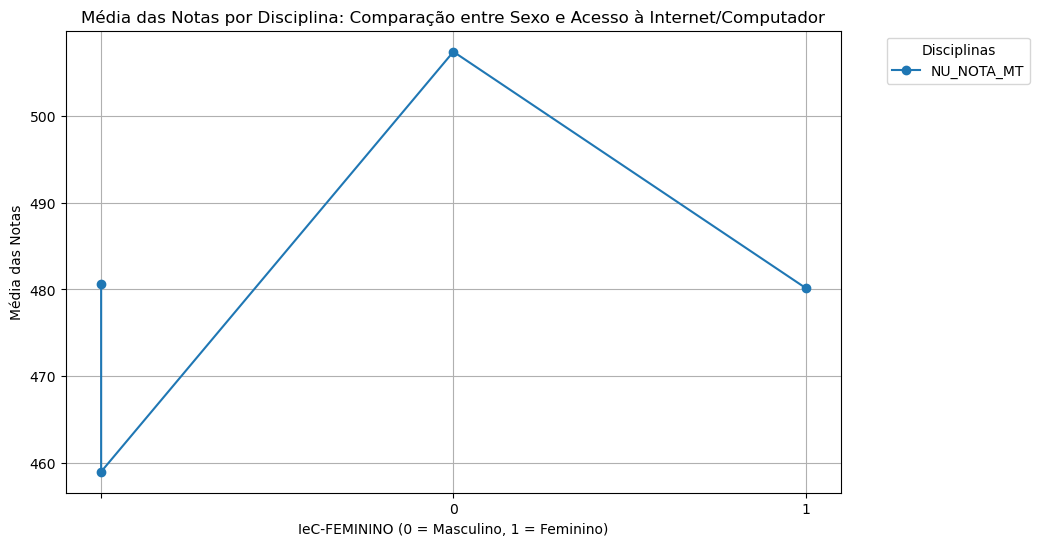

In [19]:

plt.figure(figsize=(10, 6))

# Plotando as linhas para cada disciplina
for nota in ['NU_NOTA_MT']:
    plt.plot(IeC_Sexo['IeC']* IeC_Sexo['FEMININO'].astype(str), IeC_Sexo[nota], marker='o', label=nota)

# Configurações adicionais do gráfico
plt.title('Média das Notas por Disciplina: Comparação entre Sexo e Acesso à Internet/Computador')
plt.xlabel('IeC-FEMININO (0 = Masculino, 1 = Feminino)')
plt.ylabel('Média das Notas')
plt.legend(title='Disciplinas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


In [21]:
IeC_Sexo.to_excel("mis_IeC.xlsx")

In [ ]:

# Plotando o gráfico
plt.figure(figsize=(10, 6))
for nota in ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']:
    plt.plot(IeC_Sexo['IeC'] + '-' + IeC_Sexo['FEMININO'].astype(str), IeC_Sexo[nota], marker='o', label=nota)

plt.title('Média das Notas por Acesso à Internet/Computador e Sexo')
plt.xlabel('IeC-FEMININO (0 = Masculino, 1 = Feminino)')
plt.ylabel('Média das Notas')
plt.legend(title='Notas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()